In [1]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np

In [2]:
class FunctionMinimizationEnv(gym.Env):
    def __init__(self, max_step=100, patience=10):
        super().__init__()
        self.param_dim = 1  # Example: 1 parameter
        self.action_space_limit = [-1, 1]
        self.action_space = spaces.Box(
            low=self.action_space_limit[0],
            high=self.action_space_limit[1],
            shape=(self.param_dim,),
            dtype=np.float32,
        )
        self.observation_space = spaces.Box(
            low=-np.inf, high=np.inf, shape=(self.param_dim,), dtype=np.float32
        )
        self.state = np.zeros(self.param_dim, dtype=np.float32)
        self.count = 0
        self.global_value = float("inf")
        self.max_step = max_step
        self.patience = patience
        self.patience_remaining = patience

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.state = np.random.uniform(-10, 10, size=(self.param_dim,))
        # self.state = np.array([10], dtype=np.float32)  # Fixed start
        self.count = 0
        self.global_value = self.target_function(self.state)
        self.patience_remaining = self.patience
        # Gymnasium reset returns (obs, info)
        return self.state, {}

    def step(self, action):
        action = np.asarray(action, dtype=np.float32)
        action = np.clip(action, self.action_space_limit[0], self.action_space_limit[1])
        self.state = self.state + action
        value = self.target_function(self.state)
        # reward = self.global_value - value  # Positive reward for improvement
        
        epsilon = 1e-6  # Prevent division by zero
        alpha = 1.0  # Tune as needed
        improvement = self.global_value - value
        reward = improvement + alpha * (1 / (np.abs(value) + epsilon))

        if reward > 0:  # Improvement found
            self.global_value = value  # Update global best
            self.patience_remaining = self.patience  # Reset patience
        else:  # No improvement
            self.patience_remaining -= 1

        self.count += 1
        if self.patience_remaining <= 0 or self.count >= self.max_step:
            terminated = True
        else:
            terminated = False
            
        truncated = False
        info = {
            "action": action,
            "state": self.state,
            "value": value,
            "global_value": self.global_value,
            "reward": reward,
            "steps": self.count,
            "patience_remaining": self.patience_remaining,
        }
        # Gymnasium step returns (obs, reward, terminated, truncated, info)
        return self.state, reward, terminated, truncated, info

    def target_function(self, x):
        return np.sum(x**2)  # Example: minimize sum of squares

In [3]:
from stable_baselines3 import SAC

env = FunctionMinimizationEnv(patience=20, max_step=50)
model = SAC("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=1000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 37.2     |
|    ep_rew_mean     | -152     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 254      |
|    time_elapsed    | 0        |
|    total_timesteps | 149      |
| train/             |          |
|    actor_loss      | 6        |
|    critic_loss     | 99       |
|    ent_coef        | 0.986    |
|    ent_coef_loss   | -0.0189  |
|    learning_rate   | 0.0003   |
|    n_updates       | 48       |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40.6     |
|    ep_rew_mean     | 8.39e+03 |
| time/              |          |
|    episodes        | 8        |
|    fps             | 125      |
|    time_elapsed    | 2        |
|    total_timesteps | 325      |
| train/             |

,action,state,value,global_value,reward,steps,patience_remaining
0,[-0.999301],[5.372029261957305],28.858698,28.858698,11.769803,1,20
1,[-0.9992822],[4.372747080694335],19.120917,19.120917,9.790080,2,20
2,[-0.9992623],[3.37348480738272],11.380400,11.380400,7.828388,3,20
3,[-0.9992353],[2.3742495349751884],5.637061,5.637061,5.920736,4,20
4,[-0.9992193],[1.3750302366124565],1.890708,1.890708,4.275255,5,20
5,[-0.99761105],[0.37741919077505415],0.142445,0.142445,8.768455,6,20
6,[-0.41716778],[-0.03974859200845415],0.001580,0.001580,632.671712,7,20
7,[-0.03324151],[-0.0729901023996895],0.005328,0.005328,187.664390,8,20
8,[-0.0013042092],[-0.07429431163201983],0.005520,0.005520,181.138071,9,20
9,[-7.015467e-05],[-0.07436446629892046],0.005530,0.005530,180.796708,10,20


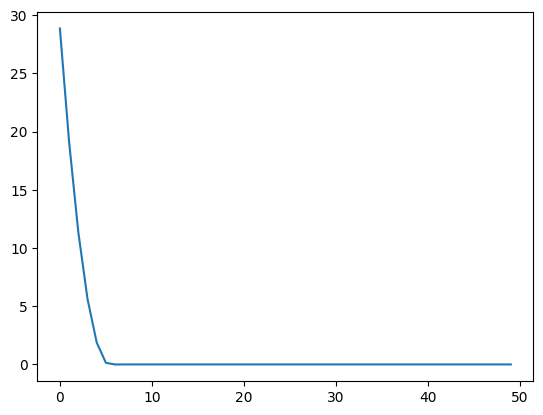

In [4]:
import pandas as pd

obs, info = env.reset()
terminated = False
truncated = False

data = []
while not (terminated or truncated):
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, info = env.step(action)
    data.append(info)

df = pd.DataFrame.from_dict(data)
df.global_value.plot()
# display(df.iloc[[0, -1], :])
display(df)

In [5]:
from stable_baselines3.common.evaluation import evaluate_policy

mean_reward, std_reward = evaluate_policy(
    model,
    env,
    n_eval_episodes=100,  # Number of episodes to run for evaluation
    deterministic=True,  # Use deterministic actions for evaluation
    render=False,  # Set to True if you want to visualize the agent
)

print(f"Mean reward: {mean_reward:.2f} +/- {std_reward:.2f}")

c:\Users\admin\Coding\research\rl-meta-test\.venv\Lib\site-packages\stable_baselines3\common\evaluation.py:70: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Mean reward: 12814.09 +/- 15306.07
